## Wrangling and Analyzing @dog_rtes Twitter account



### Table of Contents
 - [Gather](#Gather)
    - Gather data from three different sources.
    - Gather data in three different file format.
    
 - [Assess](#Assess)
 
    - Visual assessment the the gatherd data.
    - Programmatic assessment the gatherd data.
        - [Assessing twitter archive Dataset](#twitter_archive)
        - [Assessing Image Predictions](#Assessing_image)
        - [Assessing Twitter API](#Twitter_API)
        
 - [Issues To Fix](#issues) 
 - [Clean](#Clean)
   
    - Clean all the issues from the assess phase to make tidy master dataset with the gatherd data.
        - [Cleaning twitter archive Dataset](#archive_clean)
        - [Cleaning Image predictions](#image_clean)
        - [Cleaning Twitter API](#T_api)
    
 - [Sorting and Acting](#Sorting_and_Acting)
    - Save the data to a CSV or SQLite database.
    
 - [Visualisations](#Visualisations)
    - The master dataset analyzed with 3 separate insights.
 
 - [References](#References)

---
---

In [1]:
# Import packages

import pandas as pd
import numpy as np
import requests
import os 
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

# for better display tables or columns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)


<a id='Gather'></a>

# 1. Gather

In [2]:
# Twitter Archive dataset contains tweets with more informations.

tweet_arc = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# downloading (programatically) and loading image prediction file

url = 'https://video.udacity-data.com/topher/2018/November/5bf60fe7_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

image_pre = pd.read_csv('image_predictions.tsv', sep = '\t')

In [4]:
## Twitter api 
## Unfortunately i couldn't get Twitter developer access 
## I already request access but Twitter keep asking for more information evrytime .
## And i think it will tak time to get the access
## So ill be using the JSON file from udacity for the analysis.

# reading tweet json.tex file provided by Udacity
with open('tweet-json.txt') as jf:
    tweet_api = pd.DataFrame((json.loads(line) for line in jf),
                               columns = ['id', 'favorite_count', 'retweet_count'])

<a id='Assess'></a>

# 2. Assess

<a id='twitter_archive'></a>

## Assessing twitter archive Dataset

In [5]:
# Visual assessment for twitter archive file
tweet_arc.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [6]:
tweet_arc.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [7]:
tweet_arc.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1660,683078886620553216,NaN,NaN,2016-01-02 00:14:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we see a nifty leaping pupper. Feet look deadly. Sad that the holidays are over. 9/10 undeniably huggable https://t.co/ny8mnXhGOW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683078886620553216/photo/1,9,10,None,None,None,pupper,None
899,758828659922702336,NaN,NaN,2016-07-29 00:57:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This doggo is just waiting for someone to be proud of her and her accomplishment. 13/10 legendary af https://t.co/9T2h14yn4Q,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758828659922702336/photo/1,13,10,None,doggo,None,None,None
2291,667165590075940865,NaN,NaN,2015-11-19 02:20:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Churlie. AKA Fetty Woof. Lost eye saving a school bus full of toddlers from a tsunami. Great guy. 10/10 https://t.co/li2XYBVuAY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667165590075940865/photo/1,10,10,Churlie,None,None,None,None


In [8]:
# cheking the dataset information 
tweet_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
tweet_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# cheking numerator rating
tweet_arc.rating_numerator.max(),tweet_arc.rating_numerator.min()

(1776, 0)

In [11]:
tweet_arc.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [12]:
# cheking denominator rating
tweet_arc.rating_denominator.max(),tweet_arc.rating_denominator.min()

(170, 0)

In [13]:
tweet_arc.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [14]:
# cheking if the tweet ids are unique
tweet_arc.tweet_id.is_unique

True

In [15]:
# cheking duplicated rows
tweet_arc.duplicated().sum()

0

In [16]:
# checking the name of dogs
tweet_arc.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
           ... 
Shelby        1
Antony        1
Harry         1
Autumn        1
Humphrey      1
Name: name, Length: 957, dtype: int64

In [17]:
# checking dog name with None
tweet_arc[tweet_arc.name == 'None'].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",We've got a doggy down. Requesting backup. 12/10 for both. Please enjoy https://t.co/pmarb2dG0e,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None
234,847617282490613760,8.476062e+17,4.196984e+09,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",.@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a 13/10,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
615,796563435802726400,NaN,NaN,2016-11-10 04:01:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend https://t.co/5d…,7.809316e+17,4.196984e+09,2016-09-28 00:46:20 +0000,https://twitter.com/dog_rates/status/780931614150983680/photo/1,13,10,None,None,None,None,puppo


In [18]:
# checking dog name with a
tweet_arc[tweet_arc.name == 'a'].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792255496192/photo/1,10,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [19]:
# checking the source content
tweet_arc.source.sample(5)

1715    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
627     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1987    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
357     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
464     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

In [20]:
tweet_arc.expanded_urls.sample(5)

35                                                                                                                 https://twitter.com/4bonds2carbon/status/885517367337512960
27      https://www.gofundme.com/mingusneedsus,https://twitter.com/dog_rates/status/886736880519319552/photo/1,https://twitter.com/dog_rates/status/886736880519319552/photo/1
2320                                                                                                           https://twitter.com/dog_rates/status/666437273139982337/photo/1
348                                                                                                            https://twitter.com/dog_rates/status/831670449226514432/photo/1
792                                                                                                            https://twitter.com/dog_rates/status/773670353721753600/photo/1
Name: expanded_urls, dtype: object

In [21]:
tweet_arc.text.sample(5)

1314          This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu
1306    This dog just brutally murdered a snowman. Currently toying with its nutritious remains 9/10 would totally still pet https://t.co/iKThgKnW1j
284         This is Arlo. He's officially the king of snowy tongue slips. 13/10 would comfort during inevitable brain freeze https://t.co/oXVu9pNZZv
1230          Here we see an extremely rare Bearded Floofmallow. Only a few left in the wild. 11/10 would pet with a purpose https://t.co/jVJJKlPbvq
1925         This is Earl. Earl is lost. Someone help Earl. He has no tags. Just trying to get home. 5/10 hang in there Earl https://t.co/1ZbfqAVDg6
Name: text, dtype: object

---
---

<a id='Assessing_image'></a>

## Assessing image prediction data

In [22]:
# Visual assessment for image prediction data file
image_pre.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [23]:
image_pre.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [24]:
image_pre.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
273,670832455012716544,https://pbs.twimg.com/media/CU9GjzrUkAAWPh4.jpg,1,malinois,0.317607,True,Norwegian_elkhound,0.274901,True,bathing_cap,0.114643,False
269,670815497391357952,https://pbs.twimg.com/media/CU83IZ8W4AEIh4y.jpg,1,American_Staffordshire_terrier,0.919714,True,Staffordshire_bullterrier,0.073430,True,bull_mastiff,0.000906,True


In [25]:
# cheking the dataset information 
image_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
image_pre.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
# cheking if the tweet ids are unique
image_pre.tweet_id.is_unique

True

In [28]:
# cheking if the jpg urls are unique
image_pre.jpg_url.is_unique 

False

In [29]:
# checking jpg url duplicated 
image_pre.jpg_url.duplicated().sum()

66

In [30]:
# checking duplicated
image_pre.duplicated().sum()

0

In [31]:
# value counts for Ps columns
image_pre.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
skunk                   1
bib                     1
timber_wolf             1
convertible             1
tricycle                1
Name: p1, Length: 378, dtype: int64

In [32]:
image_pre.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
minibus                 1
confectionery           1
hand-held_computer      1
komondor                1
red_fox                 1
Name: p2, Length: 405, dtype: int64

In [33]:
image_pre.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
pop_bottle             1
cloak                  1
lampshade              1
wolf_spider            1
prairie_chicken        1
Name: p3, Length: 408, dtype: int64

---
---

<a id='Twitter_API'></a>

## Assess: Twitter APi

In [34]:
# Visual assessment for twitter api 
tweet_api.head(3)

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328


In [35]:
tweet_api.tail(3)

,id,favorite_count,retweet_count
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [36]:
tweet_api.sample(3)

,id,favorite_count,retweet_count
1847,675781562965868544,1750,537
1177,719367763014393856,3022,827
1558,688519176466644993,2520,825


In [37]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [38]:
# cheking the ids if they are unique
tweet_api.index.is_unique

True

--- 
---

<a id='issues'></a>

# issues 


### Tidiness

- Column (doggo, floofer, pupper and puppo) can be as one column. `Twitter Archive`
- All the data should be merged into 1 file 

### Quality 

- Timestamp is an object that should be DateTime. `Twitter Archive`
- Change the rating column to float. `Twitter Archive`
- Removing columne that not needed in my analysis:(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id). `Twitter Archive`
- Column (doggo, floofer, pupper and puppo) `Twitter Archive`
- Name has None and letter (a) as a name. `Twitter Archive`
- Extract decimal rating from text and Normalizing the rating to make it easy to read. `Twitter Archive`
- Expanded_urls column missing URLs. `Twitter Archive`
- Fixing and capitalizing the name column. `Twitter Archive`
- Inconsistent column name. `Image predictions`
- Has a 2075 row and the Twitter archive has a 2356 row, which should join the archive data set. `Image predictions`
- Capitalize letters for the names. `Image predictions`
- Remove the underscore from the p1, p2, p2 columns. `Image predictions`
- Need to change the id name to join other data sets using the tweet id column.` Tweet-JSON`

--- 
---


<a id='Clean'></a>

# 3. Clean

In [39]:
# Copy of the datasets
tweet_arc_clean = tweet_arc.copy()
tweet_api_clean = tweet_api.copy()
image_pre_clean = image_pre.copy()

---



<a id='archive_clean'></a>


#### Twitter Archive

##### Define
- Convert timestamp column to datetime format

##### Code

In [40]:
# Convert timestamp column to datetime format 
tweet_arc_clean['timestamp'] = pd.to_datetime(tweet_arc_clean['timestamp'])

##### Test

In [41]:
# cheking the dat type
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

##### Define
- Dropping columns that not needed in my analsys. 

##### Code

In [42]:
# Dropping columns
tweet_arc_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis = 1, inplace = True)

##### Test

In [43]:
# cheaking the co
tweet_arc_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

##### Define
- Remove inconsistent names from column name.

##### Code

In [44]:
# Remove inconsistent names from column name.
tweet_arc_clean[~tweet_arc_clean.name.str.istitle()].name.unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'],
      dtype=object)

In [45]:
tweet_arc_clean.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'mad',
       'an', 'very', 'just', 'DonDon', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'space', 'JD', 'DayZ', 'None'], np.nan, inplace=True)

##### Test

In [46]:
# checking name value count
tweet_arc_clean.name.value_counts()

Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
            ..
Kingsley     1
Jay          1
Shelby       1
Antony       1
Humphrey     1
Name: name, Length: 927, dtype: int64

##### Code

##### Define
- Making new column for dog stages since doggo, floofer, pupper, and puppo all are same. 

##### Code

In [47]:
# to to see the columns name
tweet_arc_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [48]:
# to handle none 

tweet_arc_clean.doggo.replace('None', '', inplace=True)
tweet_arc_clean.floofer.replace('None', '', inplace=True)
tweet_arc_clean.pupper.replace('None', '', inplace=True)
tweet_arc_clean.puppo.replace('None', '', inplace=True)

# merge into column
tweet_arc_clean['dog_stages'] = tweet_arc_clean.doggo + tweet_arc_clean.floofer + tweet_arc_clean.pupper + tweet_arc_clean.puppo

# handle multiple stages
tweet_arc_clean.loc[tweet_arc_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
tweet_arc_clean.loc[tweet_arc_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
tweet_arc_clean.loc[tweet_arc_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

# handle missing values
tweet_arc_clean.loc[tweet_arc_clean.dog_stages == '', 'dog_stages'] = np.nan

##### Test

In [49]:
# checking the value count for the new column dog stage
tweet_arc_clean.dog_stages.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stages, dtype: int64

##### Define 

- Extracting the decimal rating from text

##### code

In [50]:
# Extracting the decimal rating from the text column  
new_rating = tweet_arc_clean[tweet_arc_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
tweet_arc_clean.loc[new_rating.index, 'rating_numerator'] = new_rating.values


d:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


##### Test

In [51]:
new_rating

,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [52]:
tweet_arc_clean.loc[new_rating.index]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,,,,,NaN
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,,,,,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,,,,,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,,,pupper,,pupper
1689,681340665377193984,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,9.5,10,NaN,,,,,NaN
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,,,,,NaN


##### Define
- Convert rating_numerator, rating_denominator column to float format

##### Code

In [53]:
# Convert rating colmuns to float
tweet_arc_clean['rating_denominator'] = tweet_arc_clean['rating_denominator'].astype(float)
tweet_arc_clean['rating_numerator'] = tweet_arc_clean['rating_numerator'].astype(float)

##### Test

In [54]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2297 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   float64            
 7   name                1497 non-null   object             
 8   doggo               2356 non-null   object             
 9   floofer             2356 non-null   object             
 10  pupper              2356 non-null   object             
 11  puppo               2356 non-null   object             
 12  dog_stages          380 non-null  

##### Define

- Normlizing the rating to make it easy to read.

##### Code

In [55]:
# makeing new column `rating` to normlize the rating_numerator and rating_denominator
tweet_arc_clean['rating'] = tweet_arc_clean['rating_numerator'] / tweet_arc_clean['rating_denominator']

##### Test

In [56]:
tweet_arc_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stages,rating
1050,743210557239623680,2016-06-15 22:36:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Kayla, an underground poker legend. Players lose on purpose hoping she'll let them pet her. 10/10 strategic af https://t.co/EkLku795aO",https://twitter.com/dog_rates/status/743210557239623680/photo/1,10.0,10.0,Kayla,,,,,NaN,1.0
839,767191397493538821,2016-08-21 02:47:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I don't know any of the backstory behind this picture but for some reason I'm crying. 13/10 for owner and doggo https://t.co/QOKZdus9TT,https://twitter.com/dog_rates/status/767191397493538821/photo/1,13.0,10.0,NaN,doggo,,,,doggo,1.3
628,794926597468000259,2016-11-05 15:37:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Mack. He's rather h*ckin sleepy. Exceptional ears. 12/10 would boop https://t.co/XRPvTPF0VH,https://twitter.com/dog_rates/status/794926597468000259/photo/1,12.0,10.0,Mack,,,,,NaN,1.2


##### Define
-   Dropping doggo, floofer, pupper ,puppo columns since we have a spreate column for the stages and we dont need them anymore.

##### Code

In [57]:
# Dropping columns
tweet_arc_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1, inplace = True)

In [58]:
tweet_arc_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages',
       'rating'],
      dtype='object')

##### Define
- Fix urls in the expanded urls column by adding the tweet ids to the urls.

##### Code

In [59]:
# fix urls in the expanded urls column
for tweet_id, column in tweet_arc_clean.iterrows():
    tweet_arc_clean.loc[tweet_id, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(tweet_id)

##### Test

In [60]:
# cheking the table info
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   float64            
 7   name                1497 non-null   object             
 8   dog_stages          380 non-null    object             
 9   rating              2356 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 184.2+ KB


---
---

<a id='image_clean'></a>

## Image predections data cleaning

##### Define
- Inconsistent columns name can be confusing, will change colmuns name to be more consistent.

##### Code

In [61]:
# to see the columns name 
image_pre_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [62]:
# changing the columns name to be more cpmsitent.

image_pre_clean.rename(columns={'img_num':'image_number',
                                'jpg_url':'Image_link',
                                'p1': 'prediction_1',
                                'p1_conf':'prediction_confidence_1',
                                'p1_dog':'predicted_1_dog',
                                'p2':'prediction_2',
                                'p2_conf':'prediction_confidence_2',
                                'p2_dog':'predicted_2_dog',
                                'p3':'prediction_3',
                                'p3_conf':'prediction_confidence_3',
                                'p3_dog':'predicted_3_dog',
                               }, inplace=True)


##### Test

In [63]:
# to check the columns name 
image_pre_clean.sample(3)

,tweet_id,Image_link,image_number,prediction_1,prediction_confidence_1,predicted_1_dog,prediction_2,prediction_confidence_2,predicted_2_dog,prediction_3,prediction_confidence_3,predicted_3_dog
821,693095443459342336,https://pbs.twimg.com/media/CZ5entwWYAAocEg.jpg,1,ice_lolly,0.660099,False,neck_brace,0.039563,False,Yorkshire_terrier,0.033488,True
14,666094000022159362,https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg,1,bloodhound,0.195217,True,German_shepherd,0.078260,True,malinois,0.075628,True
1045,712809025985978368,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True


##### Define

- Remove underscore from the dog breed names.

##### Code

In [64]:
# prediction name columns
dog_breed_name = ['prediction_1','prediction_2','prediction_3']

for column in dog_breed_name:
    image_pre_clean[column] = image_pre_clean[column].str.replace('_',' ')

##### Test

In [65]:
# to check the columns name 
image_pre_clean.sample(3)

,tweet_id,Image_link,image_number,prediction_1,prediction_confidence_1,predicted_1_dog,prediction_2,prediction_confidence_2,predicted_2_dog,prediction_3,prediction_confidence_3,predicted_3_dog
1321,756303284449767430,https://pbs.twimg.com/media/Cn7tyyZWYAAPlAY.jpg,1,golden retriever,0.981652,True,cocker spaniel,0.006790,True,Labrador retriever,0.004325,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden retriever,0.790371,True,cocker spaniel,0.130268,True,Labrador retriever,0.064629,True
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American Staffordshire terrier,0.660085,True,Staffordshire bullterrier,0.334947,True,dalmatian,0.002697,True


##### Define

- Capitalizing the letter in prediction columns.

##### Code

In [66]:
for column in dog_breed_name:
    image_pre_clean[column] = image_pre_clean[column].str.title()

##### Test

In [67]:
image_pre_clean.sample(3)

,tweet_id,Image_link,image_number,prediction_1,prediction_confidence_1,predicted_1_dog,prediction_2,prediction_confidence_2,predicted_2_dog,prediction_3,prediction_confidence_3,predicted_3_dog
731,686683045143953408,https://pbs.twimg.com/media/CYeWlh0WAAADhsj.jpg,1,Norwich Terrier,0.100499,True,Cocker Spaniel,0.080671,True,Golden Retriever,0.079406,True
1330,757597904299253760,https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg,1,Doormat,0.836106,False,Wallet,0.056627,False,Purse,0.051333,False
1303,753026973505581056,https://pbs.twimg.com/media/CnNKCKKWEAASCMI.jpg,3,Pembroke,0.868511,True,Cardigan,0.103708,True,Shetland Sheepdog,0.018142,True


---
---


<a id='T_api'></a>
## Twitter API


##### Define
- rename id to tweet_id to make it to merge all the data to gother on tweet ide.

##### Code

In [68]:
tweet_api_clean.rename(columns={'id':'tweet_id', 'favorite_count':'favorite','retweet_count':'retweet'}, inplace=True)

##### Test

In [69]:
tweet_api_clean.head(1)

,tweet_id,favorite,retweet
0,892420643555336193,39467,8853


---
---

<a id='Sorting_and_Acting'></a>

### 4. Sorting and Acting

##### Define
 - checking all data info before merging 

##### Code

In [70]:
tweet_arc_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   expanded_urls       2356 non-null   object             
 5   rating_numerator    2356 non-null   float64            
 6   rating_denominator  2356 non-null   float64            
 7   name                1497 non-null   object             
 8   dog_stages          380 non-null    object             
 9   rating              2356 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 184.2+ KB


In [71]:
image_pre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2075 non-null   int64  
 1   Image_link               2075 non-null   object 
 2   image_number             2075 non-null   int64  
 3   prediction_1             2075 non-null   object 
 4   prediction_confidence_1  2075 non-null   float64
 5   predicted_1_dog          2075 non-null   bool   
 6   prediction_2             2075 non-null   object 
 7   prediction_confidence_2  2075 non-null   float64
 8   predicted_2_dog          2075 non-null   bool   
 9   prediction_3             2075 non-null   object 
 10  prediction_confidence_3  2075 non-null   float64
 11  predicted_3_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [72]:
tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   favorite  2354 non-null   int64
 2   retweet   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


#### Data info
   - tweet_arc_clean has 2356 entries.
   - image_pre_clean has 2075 entries.
   - tweet_api_clean has 2354 entries

##### Define
- Merging tweet_arc_clean and image_pre_clean the data to make new Dataframe.


##### Code

In [73]:
# Going with left join so only tweet have id in the archive will join 
tweet_master = pd.merge(tweet_arc_clean, image_pre_clean, how='left', on=['tweet_id'])

##### Test

In [74]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 2356 non-null   int64              
 1   timestamp                2356 non-null   datetime64[ns, UTC]
 2   source                   2356 non-null   object             
 3   text                     2356 non-null   object             
 4   expanded_urls            2356 non-null   object             
 5   rating_numerator         2356 non-null   float64            
 6   rating_denominator       2356 non-null   float64            
 7   name                     1497 non-null   object             
 8   dog_stages               380 non-null    object             
 9   rating                   2356 non-null   float64            
 10  Image_link               2075 non-null   object             
 11  image_number             2075 

##### Define
   - Merging tweet_master and tweet_api data to make final Dataframe.


##### Code

In [75]:
# Going with left join so only tweet have id in the archive will join 
tweet_master = pd.merge(tweet_master, tweet_api_clean, how='left', on=['tweet_id'])

##### Test

In [76]:
tweet_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tweet_id                 2356 non-null   int64              
 1   timestamp                2356 non-null   datetime64[ns, UTC]
 2   source                   2356 non-null   object             
 3   text                     2356 non-null   object             
 4   expanded_urls            2356 non-null   object             
 5   rating_numerator         2356 non-null   float64            
 6   rating_denominator       2356 non-null   float64            
 7   name                     1497 non-null   object             
 8   dog_stages               380 non-null    object             
 9   rating                   2356 non-null   float64            
 10  Image_link               2075 non-null   object             
 11  image_number             2075 

---

#### Define 
 - Storing the dataset to CSV file `twitter_archive_master.csv`

In [77]:
# Store the data to CSV
tweet_master.to_csv('twitter_archive_master.csv')

---
---

<a id='Visualisations'></a>

# Visualisations

##### Define
- Plotting a chart showing the most popular dogs name.

##### Code

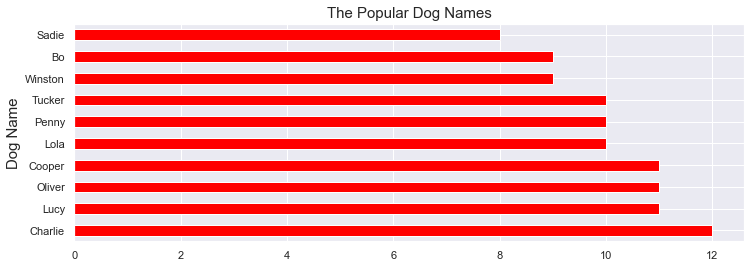

In [78]:
names = tweet_master.groupby('name').filter(lambda x: len(x) >= 8)
names['name'].value_counts().plot(kind = 'barh', figsize=(12,4), color='red')
plt.title('The Popular Dog Names', fontsize=15)
plt.ylabel('Dog Name', fontsize=15);

### Insight
 - The chart show us the most used names for dogs and As we can see from the chart the most popular name  is `Charlie`.

---

###### Define
- Plotting a chart showing common dog stage bred by people

##### Code

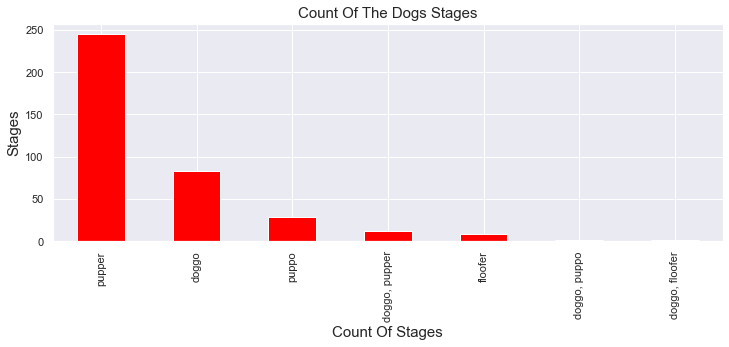

In [79]:
stages = tweet_master['dog_stages'].value_counts()
stages.plot(kind='bar', figsize=(12,4), color='red')
plt.title("Count Of The Dogs Stages", fontsize=15)
plt.xlabel("Count Of Stages" ,fontsize=15)
plt.ylabel("Stages" ,fontsize=15);

### Insight
- The chart show us the most common dog stage bred by people and as we can se the most common stage is `pupper`.

---

##### Define
- Satter plot to show us the relation between the retweets and the favorites.

##### Code

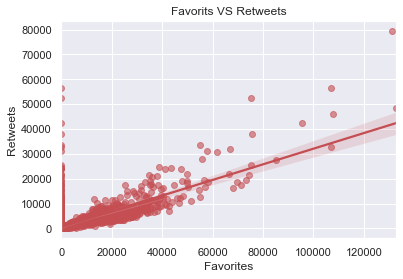

In [80]:
ax = sns.regplot(x='favorite', y='retweet', data=tweet_master, color='r',
                 scatter_kws={'alpha':0.6}) 
ax.set(xlabel='Favorites', ylabel='Retweets',
       title='Favorits VS Retweets')
plt.show()

### Insight
- As we can see from the scatter plot there is a positive correlation between the favorite and the retweets, when the retweet increase the favorites also will be increasing.

---
---
---

<a id='References'></a>

# References
- I read on the site most the time.
    - https://stackoverflow.com 
        
- To make the stages column.
    - https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o 
- Some random youtube videos.
    - https://www.youtube.com/watch?v=_wvhLWFlvYE&t=179s 
- And udacity.com lessons.

